# Practical tasks

##### Please explore the datasets and answer the questions below.
##### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.cluster import KMeans
# you will need to import more libraries as needed

# Clustering tasks

The problem that we are going to solve in this section is to segment customers into different groups based on their shopping trends.

The dataset for this problem `shopping-data.csv`

#### 1. Load the data and preview

In [2]:
customer_data = pd.read_csv('shopping-data.csv')

In [3]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### 2. Plot scatter plot for annual income and spending score which will be used for clustering in the next steps

<Axes: title={'center': 'Scatter Plot of Annual Income vs Spending Score'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

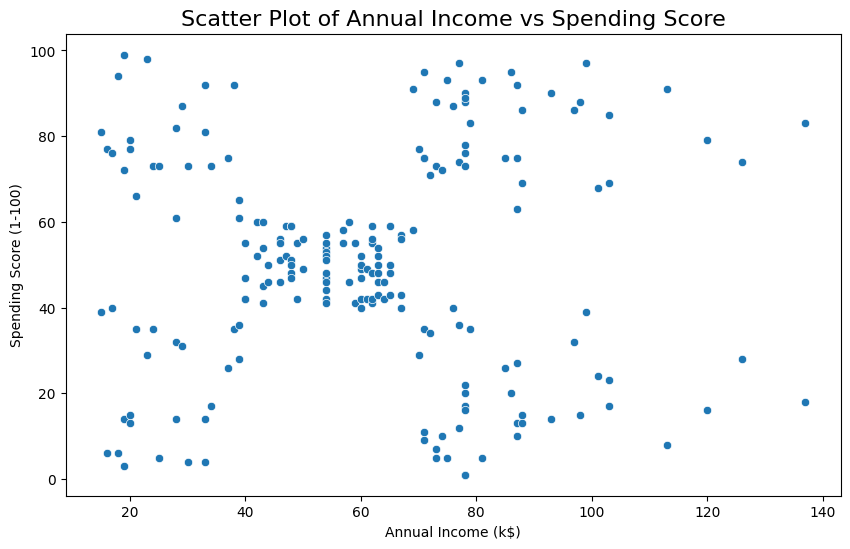

In [6]:
plt.figure(figsize=(10,6))
title = "Scatter Plot of Annual Income vs Spending Score"
plt.title(title, fontsize=16)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=customer_data)

The scatter plot illustrates the relationship between annual income and spending score for a group of customers.
These patterns suggest the presence of distinct customer segments with different spending behaviors, making the plot a useful starting point for market segmentation or clustering analysis.

#### 3. Normalize the data

In [14]:
# Normalize the numerical features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Min Max scaling
minmax = MinMaxScaler() 
df_minmax = customer_data.copy() 
df_minmax[num_cols] = minmax.fit_transform(customer_data[num_cols]) 
X_scaled = minmax.fit_transform(customer_data[num_cols])
print("Min–Max Normalized Data:") 
print(df_minmax.head())

# Z - Score Standardization
zscore = StandardScaler()
df_zscore = customer_data.copy() 
df_zscore[num_cols] = zscore.fit_transform(customer_data[num_cols]) 
print("Z-Score Standardized Data:") 
print(df_zscore.head())    

Min–Max Normalized Data:
   CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male  0.019231            0.000000                0.387755
1           2    Male  0.057692            0.000000                0.816327
2           3  Female  0.038462            0.008197                0.051020
3           4  Female  0.096154            0.008197                0.775510
4           5  Female  0.250000            0.016393                0.397959
Z-Score Standardized Data:
   CustomerID   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male -1.424569           -1.738999               -0.434801
1           2    Male -1.281035           -1.738999                1.195704
2           3  Female -1.352802           -1.700830               -1.715913
3           4  Female -1.137502           -1.700830                1.040418
4           5  Female -0.563369           -1.662660               -0.395980


#### 4. Use Elbow method to decide number of clusters

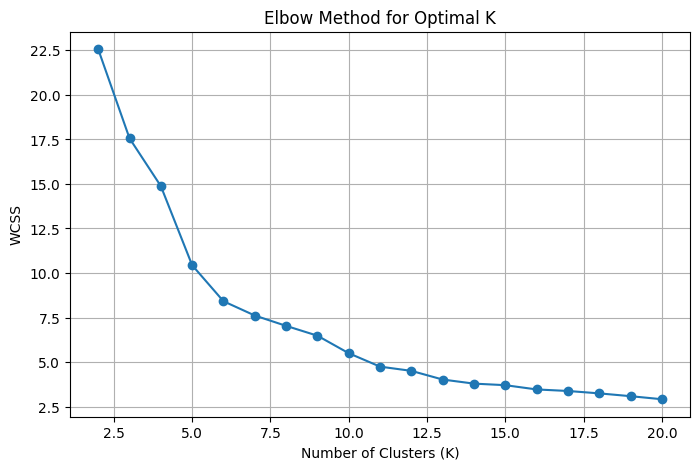

In [ ]:
wcss = [] 
K_range = range(2, 21)
for k in K_range: 
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42) 
    kmeans.fit(X_scaled) 
    wcss.append(kmeans.inertia_) 

# Plot the Elbow Curve 
plt.figure(figsize=(8,5)) 
plt.plot(K_range, wcss, marker='o') 
plt.title("Elbow Method") 
plt.xlabel("Number of Clusters (K)") 
plt.ylabel("WCSS") 
plt.grid(True) 
plt.show()

The elbow plot shows how the within‑cluster sum of squares (WCSS) decreases as the number of clusters increases
After K = 5, the curve begins to flatten, meaning further increases in K provide only marginal improvement

#### 5. Perform Clustering using KMeans

In [18]:
# Run K-Means with optimal K as 5
k = 5
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
customer_data["Cluster"] = clusters

print(customer_data.head())




   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        4  
2        2  
3        4  
4        4  


#### 6. Plot scatter plot and color code in clustered groups

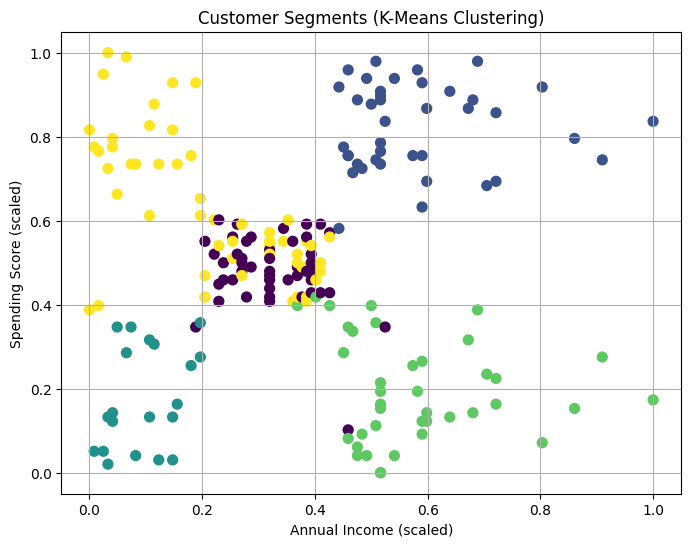

In [19]:
# scatterplot of Annual income vs spending score
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:, 1],
    X_scaled[:, 2], 
    c=clusters,
    cmap="viridis",
    s=50
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Customer Segments (K-Means Clustering)")
plt.grid(True)
plt.show()

The scatter plot displays the customer segments identified through K‑Means clustering
The separation between clusters suggests meaningful differences in customer characteristics, making these segments useful for analysis and recommendations

#### 7. Plot dendrogram to decide number of clusters for Hierarchical Clustering. <br> Explain (free text in a markdown cell) what is the optimal number of clusters and why

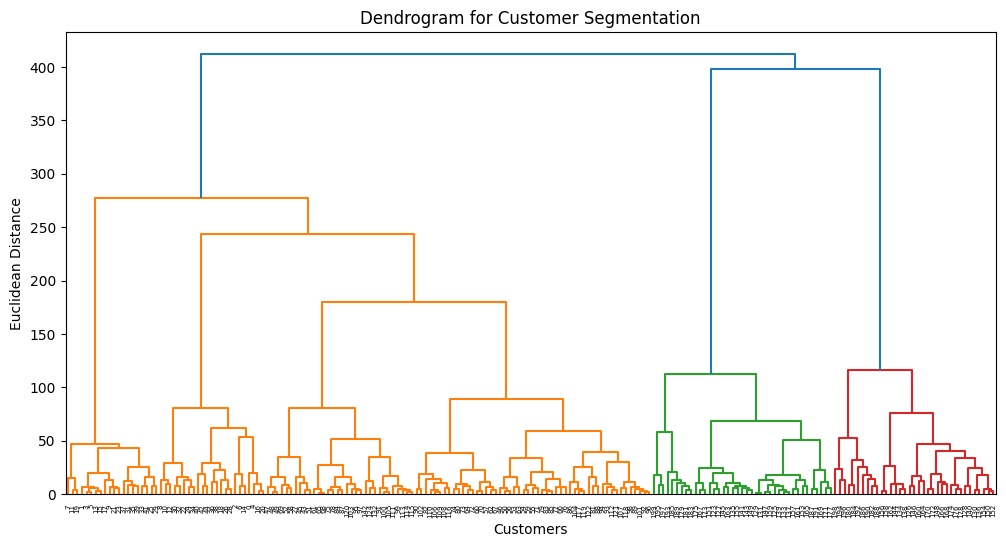

In [27]:
import scipy.cluster.hierarchy as shc
X = customer_data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
Z = shc.linkage(X, method='ward')

plt.figure(figsize=(12, 6)) 
shc.dendrogram(Z) 
plt.title("Dendrogram for Customer Segmentation") 
plt.xlabel("Customers") 
plt.ylabel("Euclidean Distance") 
plt.show()

Cutting the dendrogram at large vertical jump(merges two clusters far apart) lines that does not crosses the any horizontal line - here at ~300 shows there are 5 different clusters in the customer data
If we cut the denrogram at very top then the customer segmentaion will be pre mature group of customers
If we cut at lower level may segment the customers are more likely similar groups

Based on the Income and spending pattern generally classified as below
High income High Spending
High income Low Spending
Low income High Spending
Low income Low Spending
Moderate income Moderate Spending

So optimal number of clusters = 5

#### 8. Do clustering using Hierarchical Clustering

In [ ]:
# Using Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering( 
    n_clusters=5, 
    metric='euclidean', 
    linkage='ward' ) 
clusters = hc.fit_predict(X_scaled)
customer_data["Cluster"] = clusters 
print(customer_data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        1  
1        4  
2        1  
3        4  
4        1  


#### 9. Plot scatter plot and color code in clustered groups

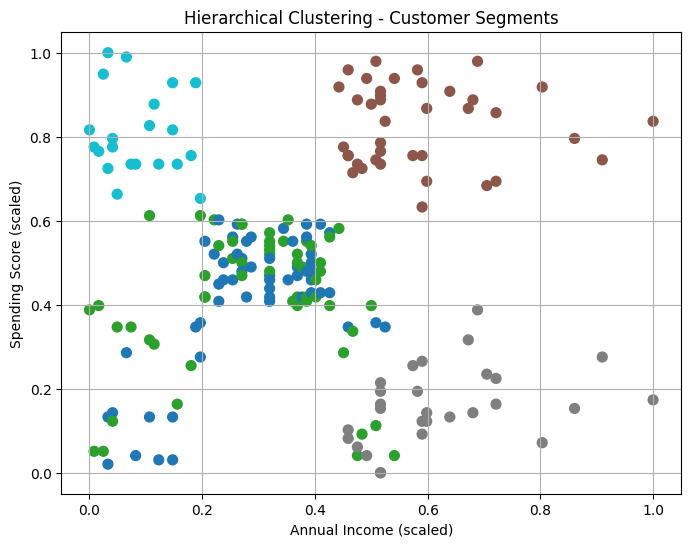

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_scaled[:, 1],  # Annual Income
    X_scaled[:, 2],  # Spending Score
    c=clusters,
    cmap="tab10",
    s=50
)
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title("Hierarchical Clustering - Customer Segments")
plt.grid(True)
plt.show()


####  10. Do KMeans and DBSCAN clustering on this data

In [31]:
from sklearn.datasets import make_moons
#moons_X: Data, moon_y: Labels
moons_X, moon_y = make_moons(n_samples=2000)

Text(0.5, 1.0, 'Half Moons')

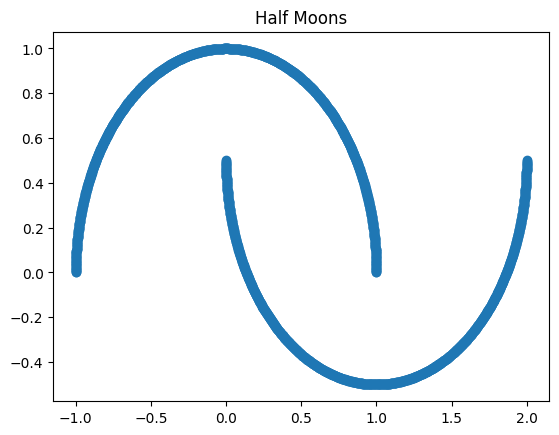

In [32]:
plt.scatter(moons_X[:,0],moons_X[:,1])
plt.title('Half Moons')

#### Using KMeans (do clustering and plot results (each cluster in own color))

In [35]:
from sklearn.cluster import KMeans, DBSCAN

kmeans = KMeans(n_clusters=2, random_state=42) 
kmeans_labels = kmeans.fit_predict(moons_X)

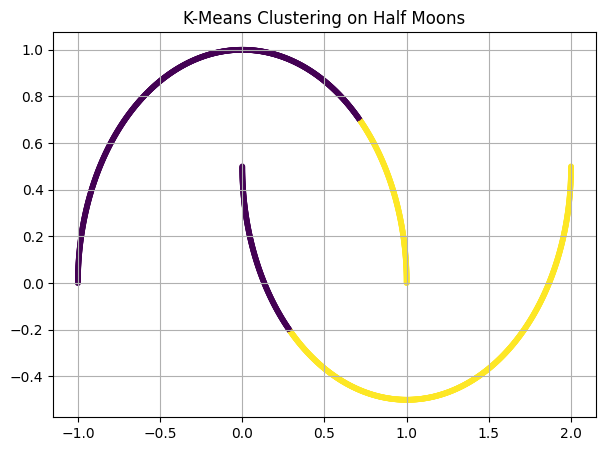

In [36]:
plt.figure(figsize=(7,5)) 
plt.scatter(moons_X[:,0], moons_X[:,1], c=kmeans_labels, cmap='viridis', s=10) 
plt.title("K-Means Clustering on Half Moons") 
plt.grid(True) 
plt.show()

K‑Means assumes spherical clusters.
The half‑moons dataset is non‑linear, so K‑Means incorrectly cuts the moons into straight‑line partitions.
As we can see clusters sliced through the middle.

#### 11. Using DBSCAN do clustering and plot results (each cluster in own color). Find the most suitable eps and minimal samples number

In [37]:
dbscan = DBSCAN(eps=0.15, min_samples=10) 
dbscan_labels = dbscan.fit_predict(moons_X)

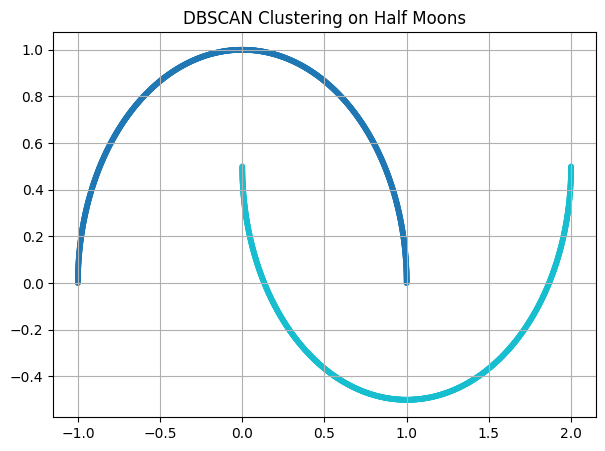

In [38]:
plt.figure(figsize=(7,5)) 
plt.scatter(moons_X[:,0], moons_X[:,1], c=dbscan_labels, cmap='tab10', s=10) 
plt.title("DBSCAN Clustering on Half Moons") 
plt.grid(True) 
plt.show()

#### 12. Compare the results of K-means and DBSCAN clustering
Explain why one or another is prefferable for such dataset, and differences if any.

K‑Means:
-assumes spherical clusters.
-The half‑moons dataset is non‑linear, so K‑Means incorrectly cuts the moons into straight‑line partitions.
-As we can see clusters sliced through the middle.

DBSCAN:
-groups points based on density, not  with the shape.
-It can detect arbitrary cluster shapes including curved ones.
-It perfectly separates the two moons.
-It also identifies noise points (label = −1)

Overall:

K‑Means fails and doesnt provide exact clustering as expected on non‑convex shapes

DBSCAN succeeds because it follows the density based geometry of the data

### Perform PCA on penguins :)
###### This section uses kaggle dataset (https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/data)
###### The tasks below include data analysis, data preprocessing, PCA, and application of classification to predict the target

#### 13. Describe the data. Do any additional exporations as you feel

In [120]:
# Dataset
penguins = pd.read_csv('penguins.csv')
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [50]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [ ]:
# Identifying missing values
penguins.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [54]:
# Drop the rows where all the values are NA
df_penguins = penguins.dropna(how="all")
df_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [62]:
# Replace . value to NaN to handle missing values
df_penguins = df_penguins.replace('.', np.nan)
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                334 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


In [69]:
# Impute missing values with mode for categorical
mode_value = df_penguins["sex"].mode()[0]
df_penguins["sex"] = df_penguins["sex"].fillna(mode_value)
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                342 non-null    object 
dtypes: float64(4), object(1)
memory usage: 16.0+ KB


In [ ]:
# decribe the data, its size to understand the data
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


#### Based on dataframe describe, in own words explain any abnormal characteristics 

Flipper_Length_mm: 
        we can see min(-132) and max(5000) which seems very odd and extreme outliers. Possible reason can be data entry error or corrupted during transfer or download
body_mass_g:
        The body mass of penguin shows between 2700 - 6300 but the distribution shows towards upper extreme. should be validated against true value 

#### 14. Explore corrupted data

In [ ]:
# find missing values. print entries with missing values, provide shape
# exploring original data
corrupted_data = penguins[penguins.isna().any(axis=1) | penguins.eq(".").any(axis=1)]
print(corrupted_data)
print(corrupted_data.shape)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3                 NaN              NaN                NaN          NaN  NaN
8                34.1             18.1              193.0       3475.0  NaN
10               37.8             17.1              186.0       3300.0  NaN
11               37.8             17.3              180.0       3700.0  NaN
47               37.5             18.9              179.0       2975.0  NaN
246              44.5             14.3              216.0       4100.0  NaN
286              46.2             14.4              214.0       4650.0  NaN
324              47.3             13.8              216.0       4725.0  NaN
336              44.5             15.7              217.0       4875.0    .
339               NaN              NaN                NaN          NaN  NaN
(10, 5)


In [76]:
# Examine sex column
penguins["sex"].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [77]:
penguins["sex"].value_counts(dropna=False)

sex
MALE      169
FEMALE    165
NaN         9
.           1
Name: count, dtype: int64

In [ ]:
# find any unusual values. Print anomal rows

# Identify NA and '.' values in sex column
# Identify the outliers in flipper_length_mm and body_mass_g assuming the possible range

anomalies = penguins[
    penguins.isna().any(axis=1) |
    penguins.eq(".").any(axis=1) |
    (penguins["flipper_length_mm"] < 100) |
    (penguins["flipper_length_mm"] > 250) |
    (penguins["body_mass_g"] < 2000) |
    (penguins["body_mass_g"] > 7000)
]

print(anomalies)
print("Number of anomalous rows:", anomalies.shape[0])


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g   sex
3                 NaN              NaN                NaN          NaN   NaN
8                34.1             18.1              193.0       3475.0   NaN
9                42.0             20.2             5000.0       4250.0  MALE
10               37.8             17.1              186.0       3300.0   NaN
11               37.8             17.3              180.0       3700.0   NaN
14               34.6             21.1             -132.0       4400.0  MALE
47               37.5             18.9              179.0       2975.0   NaN
246              44.5             14.3              216.0       4100.0   NaN
286              46.2             14.4              214.0       4650.0   NaN
324              47.3             13.8              216.0       4725.0   NaN
336              44.5             15.7              217.0       4875.0     .
339               NaN              NaN                NaN          NaN   NaN

#### 15. Based on observations above, prepare the data for PCA. Only valid rows should be present. <br> Preview dataframe, show its size

In [93]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [94]:
# clean
# Clean sex column by replacing '.' with NaN and then handling
penguins = penguins.dropna(how="all")
penguins["sex"] = penguins["sex"].replace(".", np.nan)
mode_value = penguins["sex"].mode()[0]
penguins["sex"] = penguins["sex"].fillna(mode_value)
#penguins = penguins.dropna(subset=["sex"])

In [95]:
# Clean flipper_length_mm and body_mass_g by filtering out values outside the expected range
penguins = penguins[
    (penguins["flipper_length_mm"] > 100) &
    (penguins["flipper_length_mm"] < 250) &
    (penguins["body_mass_g"] > 2000) &
    (penguins["body_mass_g"] < 7000)
]


In [96]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   340 non-null    float64
 1   culmen_depth_mm    340 non-null    float64
 2   flipper_length_mm  340 non-null    float64
 3   body_mass_g        340 non-null    float64
 4   sex                340 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.9+ KB


In [97]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,340.000000,340.000000,340.000000,340.000000
mean,43.955000,17.130588,200.955882,4201.029412
std,5.451108,1.961880,14.089719,804.240035
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.575000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4025.000000
75%,48.500000,18.625000,213.250000,4756.250000
max,59.600000,21.500000,231.000000,6300.000000


In [101]:
# scale numerical columns. assign to a variable X_penguins
from sklearn.preprocessing import StandardScaler

# Select only numerical columns for PCA
num_cols = ["culmen_length_mm", "culmen_depth_mm", 
            "flipper_length_mm", "body_mass_g"]

scaler = StandardScaler()
X_penguins = scaler.fit_transform(penguins[num_cols])


In [105]:
# assign categorical column to a variable y_penguins
penguins["sex"] = penguins["sex"].map({"MALE": 1, "FEMALE": 0})
y_penguins = penguins["sex"]
print(y_penguins.head()) 
print("Shape of y_penguins:", y_penguins.shape)
print("Shape of X_penguins:", X_penguins.shape)

0    1
1    0
2    0
4    0
5    1
Name: sex, dtype: int64
Shape of y_penguins: (340,)
Shape of X_penguins: (340, 4)


#### 15. Explain the chosen null values handling strategy, how it affects the dataset (+/-)

-Dropped rows where all values were NA
-Converted "." in the sex column to NaN
-Imputed the missing categorical value with mode() which is reliable as the number of rows with missing value is    minimal

Positive:
Can see more cleaner and reliable data
By imputing the missing sex data is partially recovered 
Removed corrupted or impossible values occured.

Negative:
Potential loss of data since few rows are removed
Introducing Bias since the mode() is used to impute the sex column

Overall we have dataset is clean, consistent, and analysis‑ready

#### 16. Perform PCA with 2 components. Plot the results 

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
penguins_pca = pca.fit_transform(X_penguins)


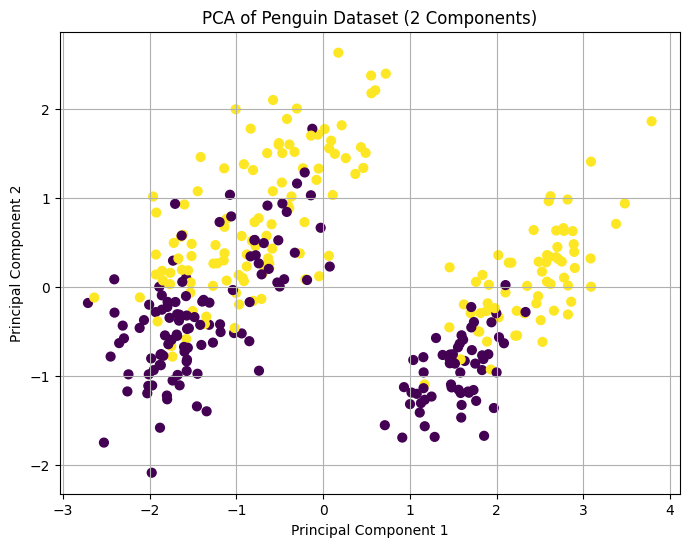

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(
    penguins_pca[:, 0],
    penguins_pca[:, 1],
    c=y_penguins,
    cmap='viridis',
    s=40
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Penguin Dataset (2 Components)")
plt.grid(True)
plt.show()


#### 17. Display scree plots to determine the optimal number of components and cumulative explained variance

In [111]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(X_penguins)

explained = pca_full.explained_variance_ratio_


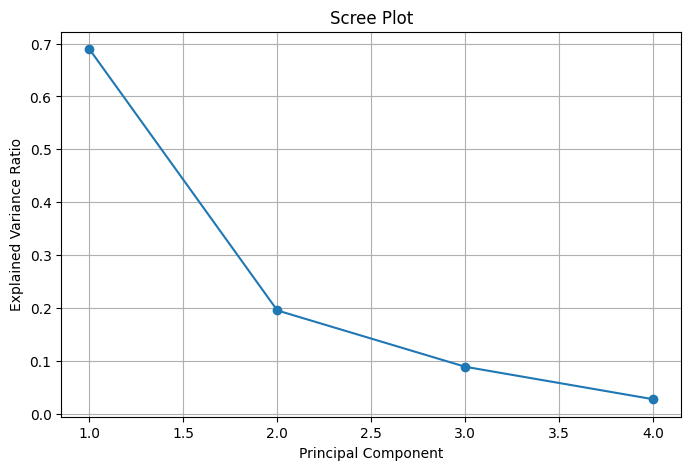

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), explained, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()


The scree plot generated has a very strong elbow at Component 1

PC1 explains ~70% of the total variance

PC2 explains much less

PC3 and PC4 contribute only small additional amounts

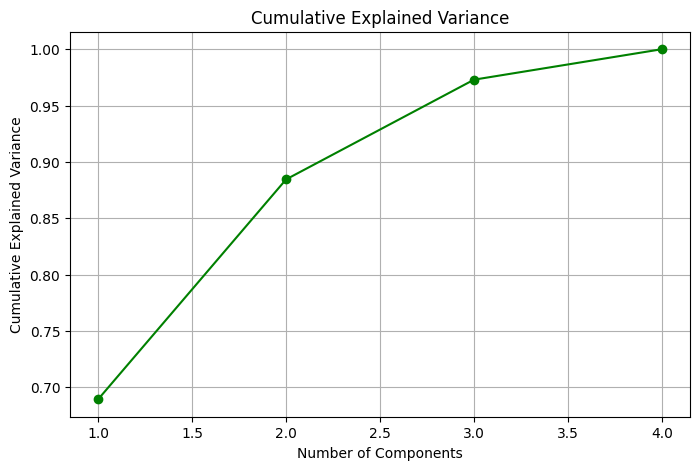

In [113]:
cumulative = explained.cumsum()

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o', color='green')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()


2 components is the optimal choice
They capture ~90% of the total variance as shown in the plot

#### 18. Calculate (show in numbers) and display component loadings

In [114]:
# Component loadings (how much each original feature contributes to each PC)

loadings = pd.DataFrame(
    pca.components_,
    columns=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"],
    index=["PC1", "PC2"]
)

print(loadings)


     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
PC1          0.454409        -0.399807           0.575928     0.549521
PC2          0.603121         0.793892           0.001484     0.077313


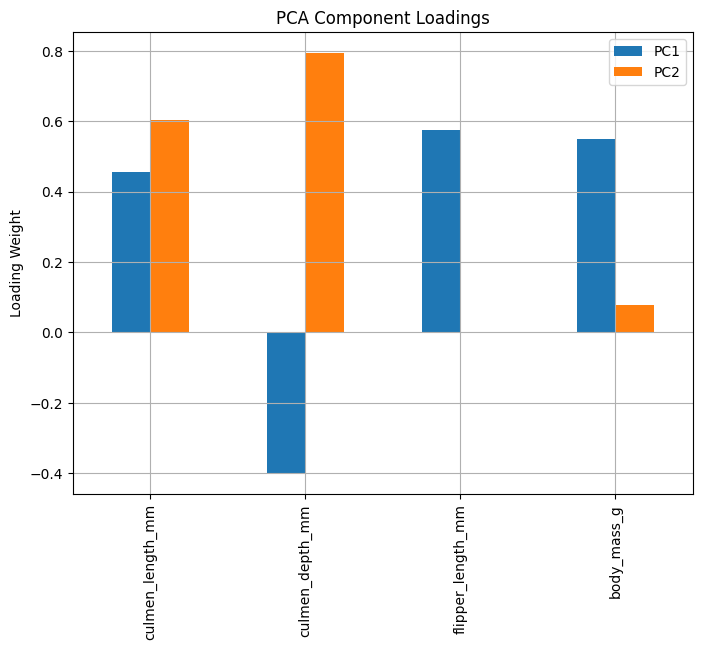

In [115]:
loadings.T.plot(kind="bar", figsize=(8,6))
plt.title("PCA Component Loadings")
plt.ylabel("Loading Weight")
plt.grid(True)
plt.show()


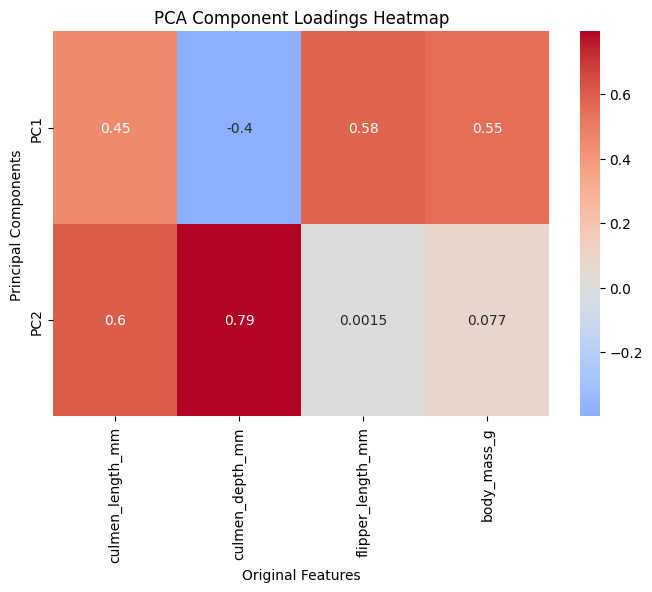

In [116]:
# show heatmap

plt.figure(figsize=(8,5))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Component Loadings Heatmap")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()


The heatmap visualizes how each original feature contributes to the first two principal components in the PCA model. PC1 is driven mainly by positive loadings from culmen length, flipper length, and body mass, while culmen depth contributes negatively. 
PC2, on the other hand, is dominated by strong positive loadings from culmen depth and culmen length, suggesting it captures variation in beak shape rather than size

#### 19. Perform logistic regression (or any other classification algorithm) and evaluate the model

In [117]:
# import necessary libraries for model training and evaluation
# Use the PCA-transformed data (X_penguins_pca) and true labels (y_penguins)
# Train and evaluate a model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    penguins_pca, 
    y_penguins, 
    test_size=0.2, 
    random_state=42,
    stratify=y_penguins
)


In [118]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [119]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74        33
           1       0.74      0.83      0.78        35

    accuracy                           0.76        68
   macro avg       0.77      0.76      0.76        68
weighted avg       0.77      0.76      0.76        68



#### 20. Train the model on all data points, and determine penguin sex for the data, where it was not originally identified

In [123]:
# 1. take entries from original data without sex, scale numerical columns
df_missing_sex = penguins[penguins["sex"].isna() | (penguins["sex"] == ".")].copy()
df_missing_sex["sex"] = df_missing_sex["sex"].replace(".", np.nan)
penguins.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


C:\Users\r.cn.radhakrishnan\AppData\Local\Temp\ipykernel_30468\4292322558.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_missing_sex["sex"] = df_missing_sex["sex"].replace(".", np.nan)


In [125]:
num_cols = ["culmen_length_mm", "culmen_depth_mm",
            "flipper_length_mm", "body_mass_g"]

X_missing = df_missing_sex[num_cols]
X_missing_scaled = scaler.transform(X_missing)


In [134]:
# Drop rows with missing values in all the rows
X_missing = X_missing.dropna()
df_missing = X_missing.loc[X_missing.index]

In [135]:
X_missing_scaled = scaler.transform(X_missing)

In [ ]:
# 2. apply the same PCA transformation to the new data
X_missing_pca = pca.transform(X_missing_scaled)
predicted_sex = log_reg.predict(X_missing_pca)
df_missing["predicted_sex"] = predicted_sex
df_missing["predicted_sex"].value_counts()

predicted_sex
0    8
Name: count, dtype: int64

In [142]:
# 3. Train the model
# Define X_train and y_train using all PCA data from valid data
X_train = penguins_pca
y_train = y_penguins
log_reg_full = LogisticRegression() 
log_reg_full.fit(X_train, y_train)

# Train a classifier
clf = LogisticRegression() 
clf.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [143]:
# 4. Make predictions on the new data. Display the features and predicted values
from sklearn.metrics import accuracy_score, classification_report

y_pred_train = clf.predict(X_train)

print("Training accuracy:", accuracy_score(y_train, y_pred_train))
print("\nClassification report:\n", classification_report(y_train, y_pred_train))


Training accuracy: 0.7852941176470588

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       165
           1       0.80      0.78      0.79       175

    accuracy                           0.79       340
   macro avg       0.79      0.79      0.79       340
weighted avg       0.79      0.79      0.79       340



logistic regression model performs consistently well, with around 76–79% accuracy, balanced class performance, and no major overfitting. This makes it reliable enough to predict the sex of penguins with missing labels.